<a href="https://colab.research.google.com/github/hyungchanchoi/AlgorithmTrading_pykiwoom/blob/main/data%20analysis/kodex_kodex200_analy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import os, sys
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
cd drive/My Drive/algorithmtrading/pair_trading/Datas

/content/drive/My Drive/algorithmtrading/pair_trading/Datas


In [4]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin-1:end]

# - 과거 1분단위 데이터 받아오기

In [2]:
now = '20210113'

kodex_active = pd.read_pickle('KODEX 혁신기술테마액티브(m)_'+now)
kodex200 = pd.read_pickle('KODEX 200(m)_'+now)

temp =  pd.merge(left = kodex_active , right = kodex200, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['kodex_active','volume','kodex200','volume']
temp = temp[['kodex_active','kodex200']]

temp['kodex_active']=pd.to_numeric(temp['kodex_active'])
temp['kodex200']=pd.to_numeric(temp['kodex200'])

for i in range(len(temp)):
    if temp['kodex_active'].iloc[i] < 0:
        temp['kodex_active'].iloc[i] = -temp['kodex_active'].iloc[i]
    if temp['kodex200'].iloc[i] < 0:
        temp['kodex200'].iloc[i] = -temp['kodex200'].iloc[i]


temp['kodex_active'] = temp['kodex_active'] * 3
temp['spread'] = temp['kodex200'] - temp['kodex_active']
temp['kodex_active_cumret'] = np.log(temp['kodex_active']/temp['kodex_active'][0])
temp['kodex200_cumret'] = np.log(temp['kodex200']/temp['kodex200'][0])
temp['ma10_spread'] = temp['spread'].rolling(window=10, center=False).mean()

temp

,kodex_active,kodex200,spread,kodex_active_cumret,kodex200_cumret,ma10_spread
체결시간,,,,,,
20200929090000,30120,31030,910,0.000000,0.000000,nan
20200929090100,30060,31010,950,-0.001994,-0.000645,nan
20200929090200,30045,31035,990,-0.002493,0.000161,nan
20200929090300,30015,31015,1000,-0.003492,-0.000484,nan
20200929090400,30000,31010,1010,-0.003992,-0.000645,nan
...,...,...,...,...,...,...
20210113151200,41010,43460,2450,0.308627,0.336886,2478.500000
20210113151300,41025,43470,2445,0.308992,0.337117,2472.500000
20210113151400,41040,43475,2435,0.309358,0.337232,2471.500000


In [6]:
x = coint(temp['kodex_active'][-600:],temp['kodex200'][-600:])
x

(-5.998364023742842,
 1.636739305584055e-06,
 array([-3.91481708, -3.34634952, -3.05153805]))

# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [5]:
df = {}
calender = []
for date in range(20200929,20210113):
    if 20201231 < date < 20210100:
        continue
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        temps['kodex_active_dayret'] = np.log(temps['kodex_active']/temps['kodex_active'][0])
        temps['kodex200_dayret'] = np.log(temps['kodex200']/temps['kodex200'][0])
        temps['spread_cumret'] = temps['kodex_active_cumret'] -temps['kodex200_cumret']
        temps['spread_dayret']= temps['kodex_active_dayret'] - temps['kodex200_dayret'] 
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

20200930 는 공휴일 입니다.
20200931 는 공휴일 입니다.
20200932 는 공휴일 입니다.
20200933 는 공휴일 입니다.
20200934 는 공휴일 입니다.
20200935 는 공휴일 입니다.
20200936 는 공휴일 입니다.
20200937 는 공휴일 입니다.
20200938 는 공휴일 입니다.
20200939 는 공휴일 입니다.
20200940 는 공휴일 입니다.
20200941 는 공휴일 입니다.
20200942 는 공휴일 입니다.
20200943 는 공휴일 입니다.
20200944 는 공휴일 입니다.
20200945 는 공휴일 입니다.
20200946 는 공휴일 입니다.
20200947 는 공휴일 입니다.
20200948 는 공휴일 입니다.
20200949 는 공휴일 입니다.
20200950 는 공휴일 입니다.
20200951 는 공휴일 입니다.
20200952 는 공휴일 입니다.
20200953 는 공휴일 입니다.
20200954 는 공휴일 입니다.
20200955 는 공휴일 입니다.
20200956 는 공휴일 입니다.
20200957 는 공휴일 입니다.
20200958 는 공휴일 입니다.
20200959 는 공휴일 입니다.
20200960 는 공휴일 입니다.
20200961 는 공휴일 입니다.
20200962 는 공휴일 입니다.
20200963 는 공휴일 입니다.
20200964 는 공휴일 입니다.
20200965 는 공휴일 입니다.
20200966 는 공휴일 입니다.
20200967 는 공휴일 입니다.
20200968 는 공휴일 입니다.
20200969 는 공휴일 입니다.
20200970 는 공휴일 입니다.
20200971 는 공휴일 입니다.
20200972 는 공휴일 입니다.
20200973 는 공휴일 입니다.
20200974 는 공휴일 입니다.
20200975 는 공휴일 입니다.
20200976 는 공휴일 입니다.
20200977 는 공휴일 입니다.
20200978 는 공휴일 입니다.
20200979 는 공휴일 입니다.


['20201005',
 '20201006',
 '20201007',
 '20201008',
 '20201012',
 '20201013',
 '20201014',
 '20201015',
 '20201016',
 '20201019',
 '20201020',
 '20201021',
 '20201022',
 '20201023',
 '20201026',
 '20201027',
 '20201028',
 '20201029',
 '20201030',
 '20201102',
 '20201103',
 '20201104',
 '20201105',
 '20201106',
 '20201109',
 '20201110',
 '20201111',
 '20201112',
 '20201113',
 '20201116',
 '20201117',
 '20201118',
 '20201119',
 '20201120',
 '20201123',
 '20201124',
 '20201125',
 '20201126',
 '20201127',
 '20201130',
 '20201201',
 '20201202',
 '20201203',
 '20201204',
 '20201207',
 '20201208',
 '20201209',
 '20201210',
 '20201211',
 '20201214',
 '20201215',
 '20201216',
 '20201217',
 '20201218',
 '20201221',
 '20201222',
 '20201223',
 '20201224',
 '20201228',
 '20201229',
 '20201230',
 '20210104',
 '20210105',
 '20210106',
 '20210107',
 '20210108',
 '20210111',
 '20210112']

# 그래프 그리기

In [17]:
df['20210112']

,kodex_active,kodex200,spread,kodex_active_cumret,kodex200_cumret,ma10_spread,kodex_active_dayret,kodex200_dayret,spread_cumret,spread_dayret
체결시간,,,,,,,,,,
20210111153500,41310,43655,2345,0.315915,0.341363,2423.000000,0.000000,0.000000,-0.025448,0.000000
20210112090000,40800,43345,2545,0.303493,0.334237,2436.500000,-0.012423,-0.007126,-0.030744,-0.005296
20210112090100,40830,43230,2400,0.304228,0.331580,2436.000000,-0.011687,-0.009783,-0.027353,-0.001904
20210112090300,40755,43035,2280,0.302389,0.327059,2422.000000,-0.013526,-0.014304,-0.024670,0.000778
20210112090400,40605,43120,2515,0.298702,0.329032,2433.500000,-0.017213,-0.012331,-0.030331,-0.004882
...,...,...,...,...,...,...,...,...,...,...
20210112150800,40770,43285,2515,0.302757,0.332852,2398.000000,-0.013158,-0.008512,-0.030095,-0.004646
20210112151200,40770,43185,2415,0.302757,0.330539,2403.500000,-0.013158,-0.010825,-0.027782,-0.002333
20210112151300,40650,43140,2490,0.299809,0.329496,2410.000000,-0.016106,-0.011867,-0.029687,-0.004239


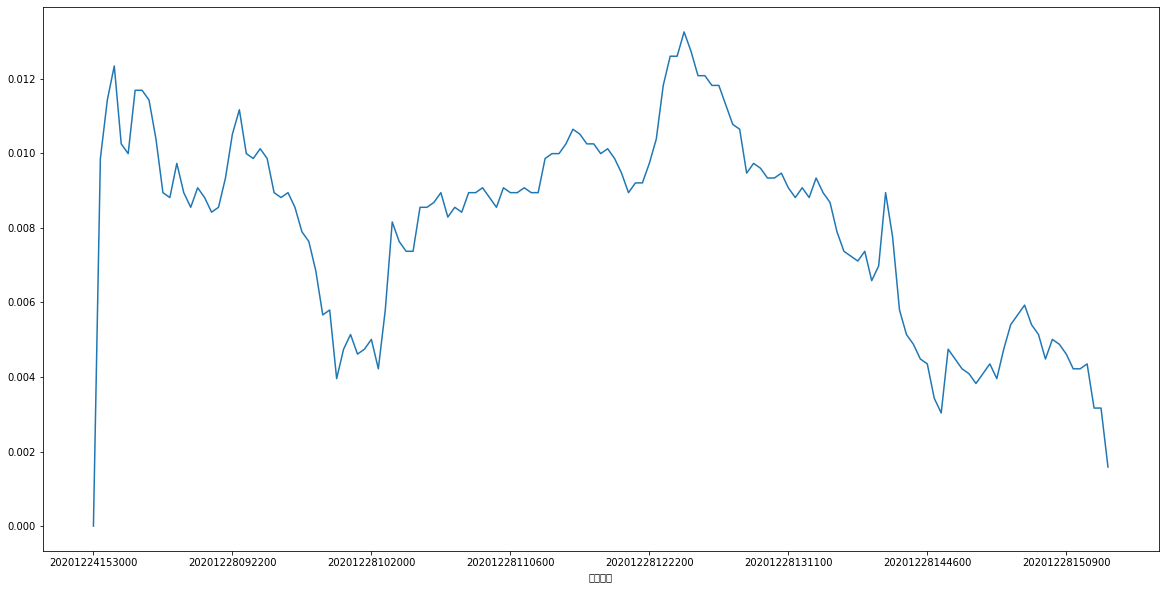

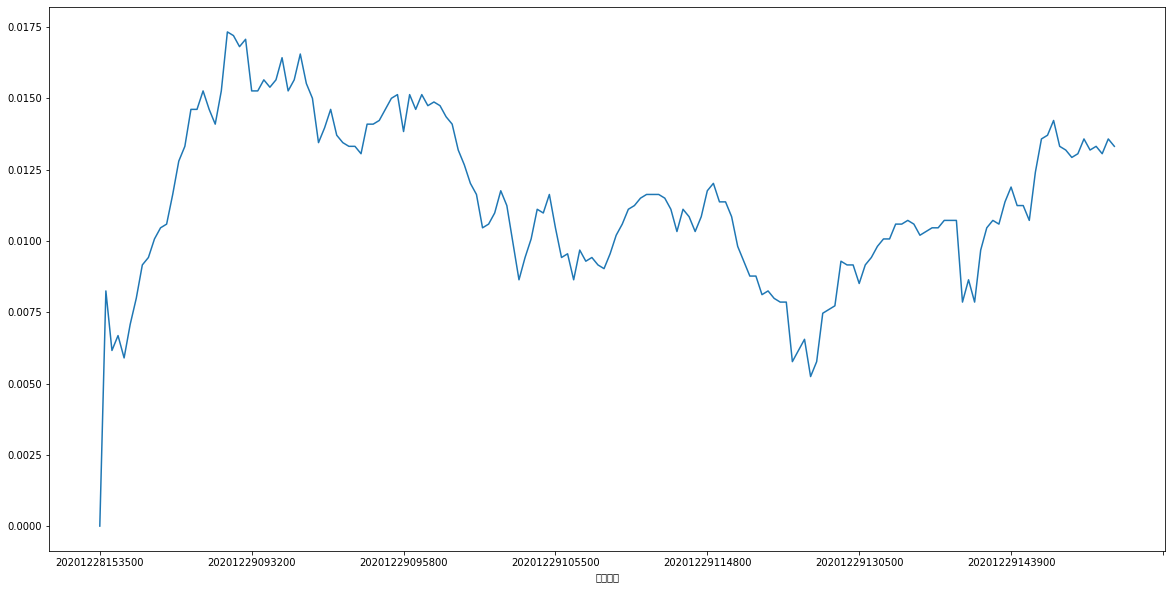

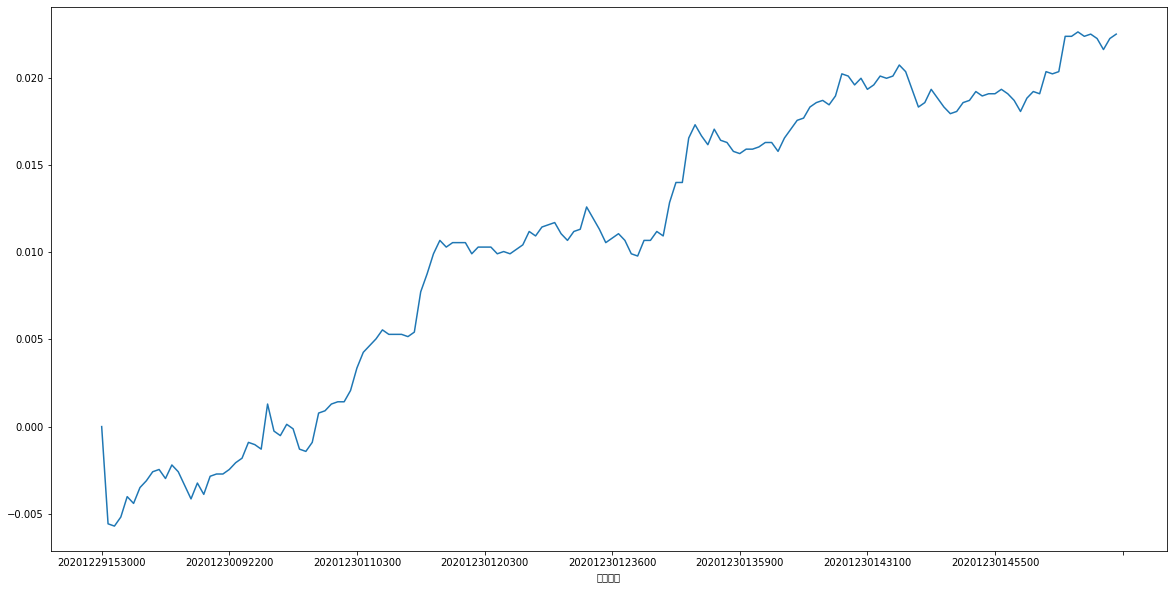

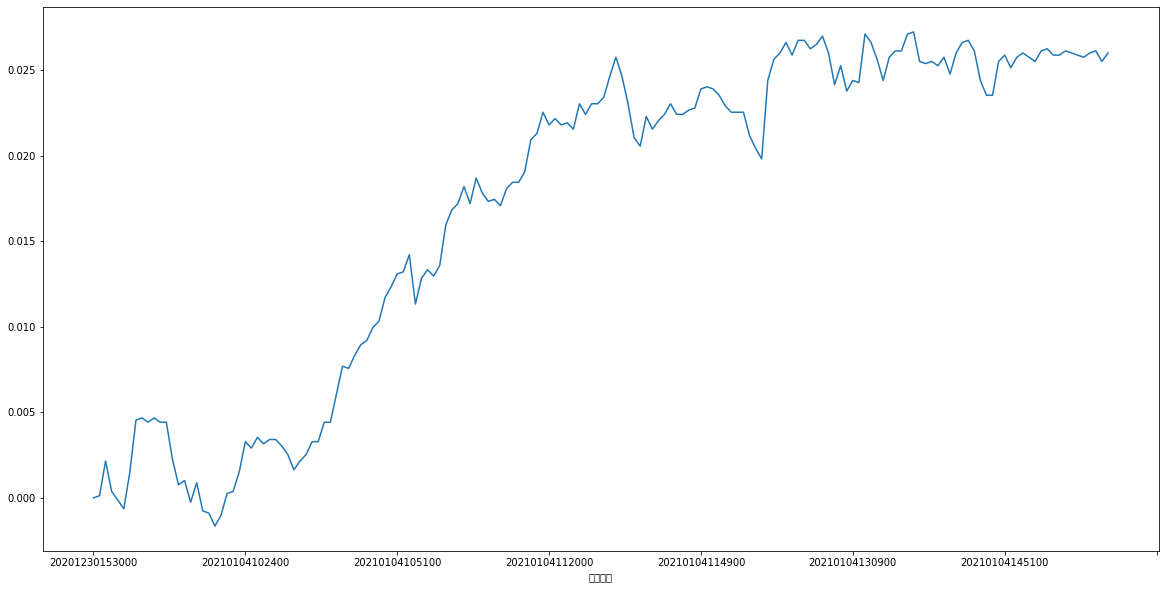

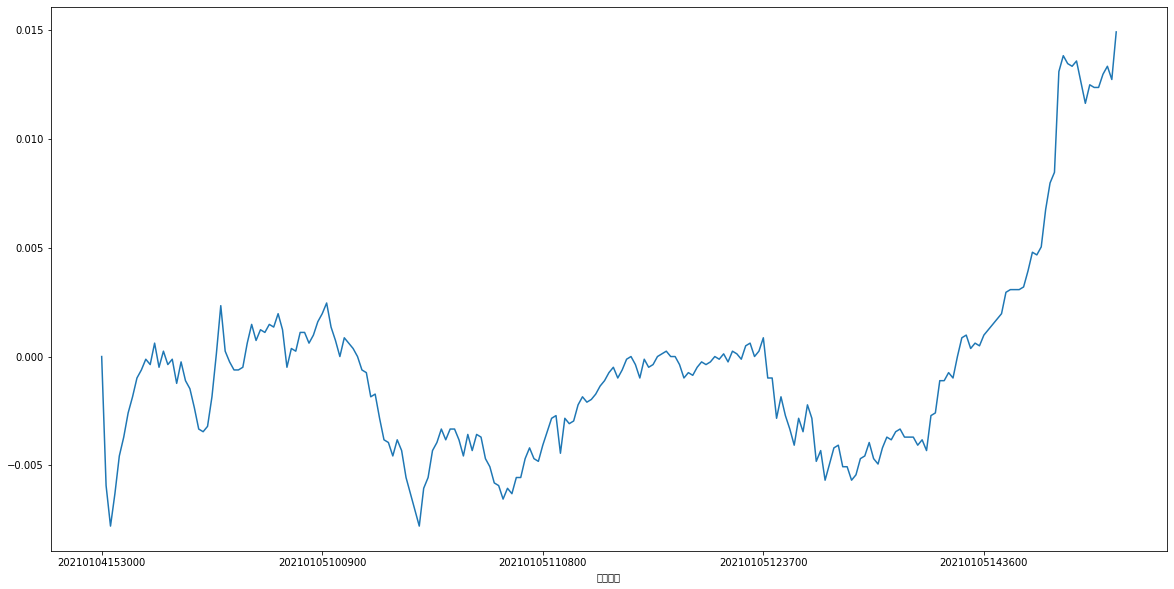

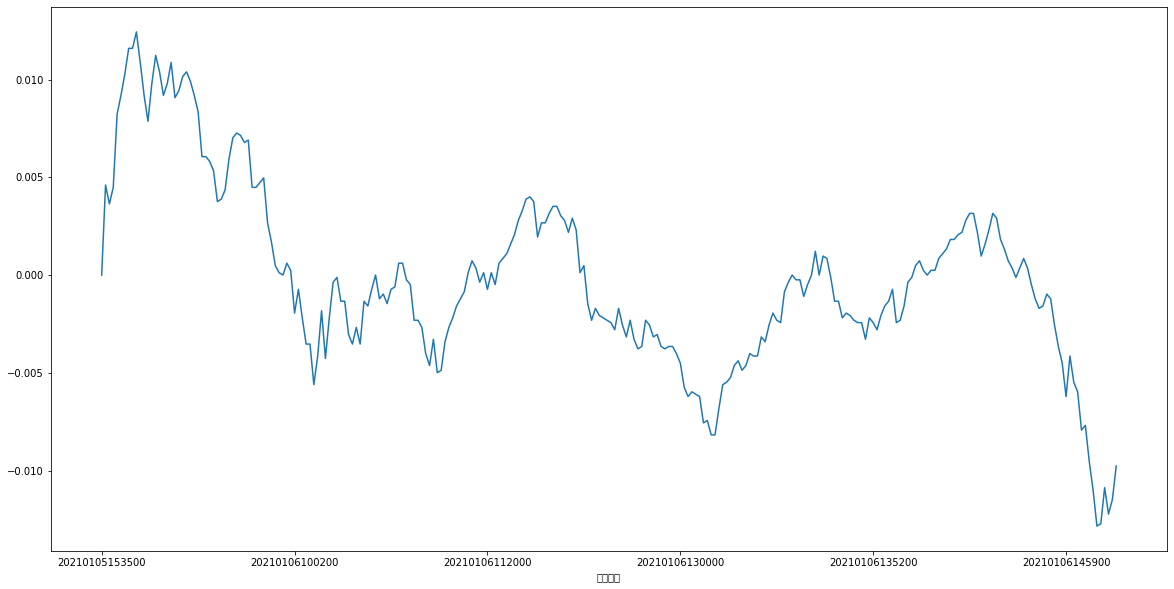

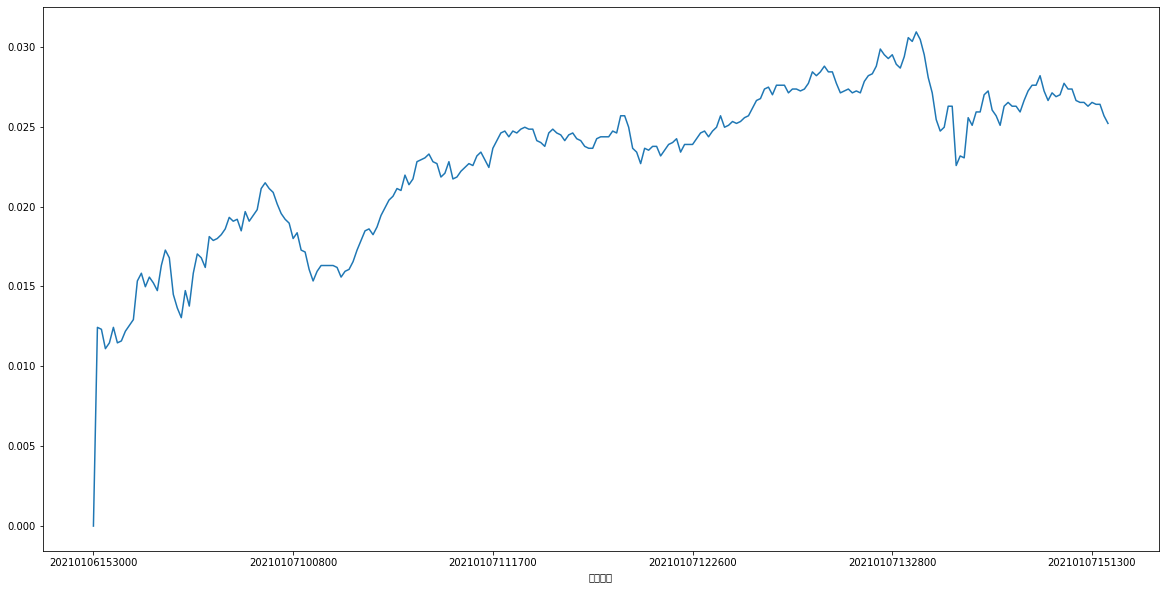

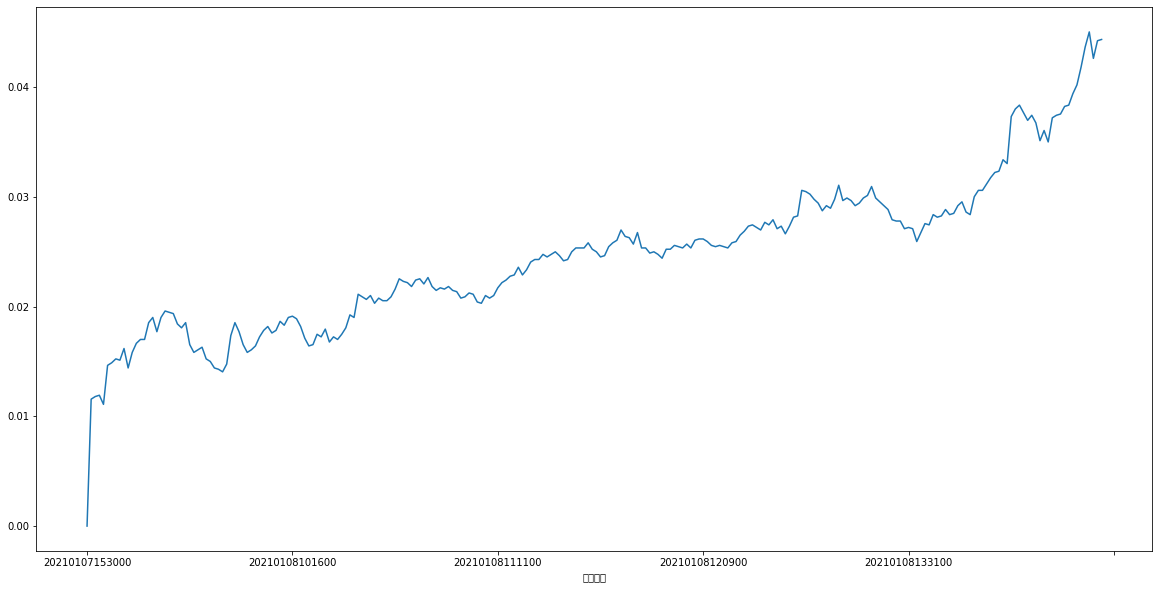

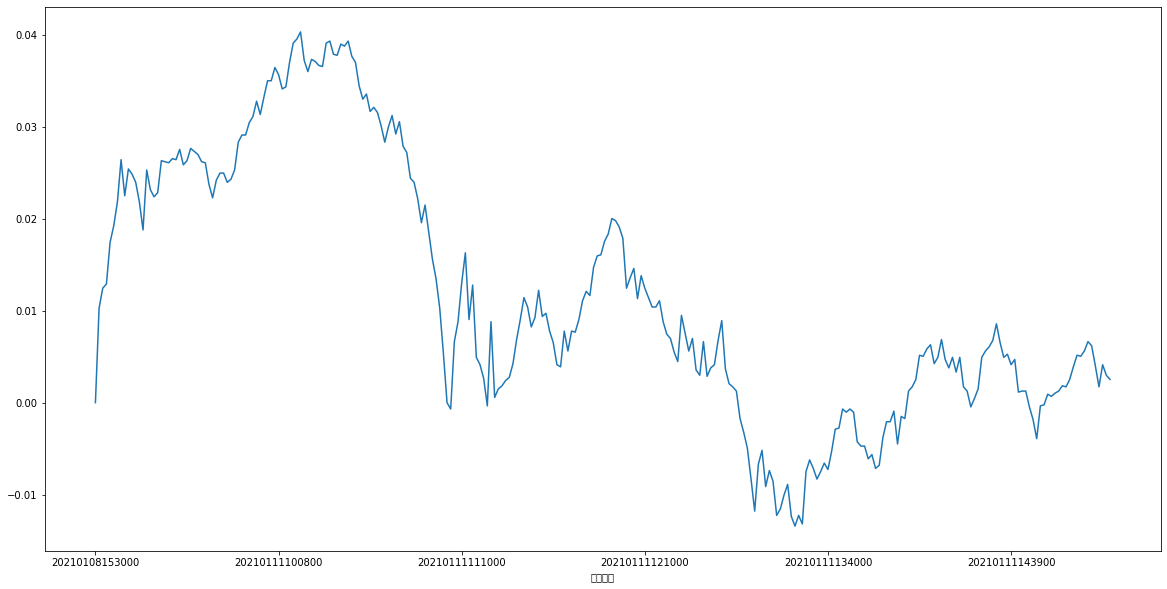

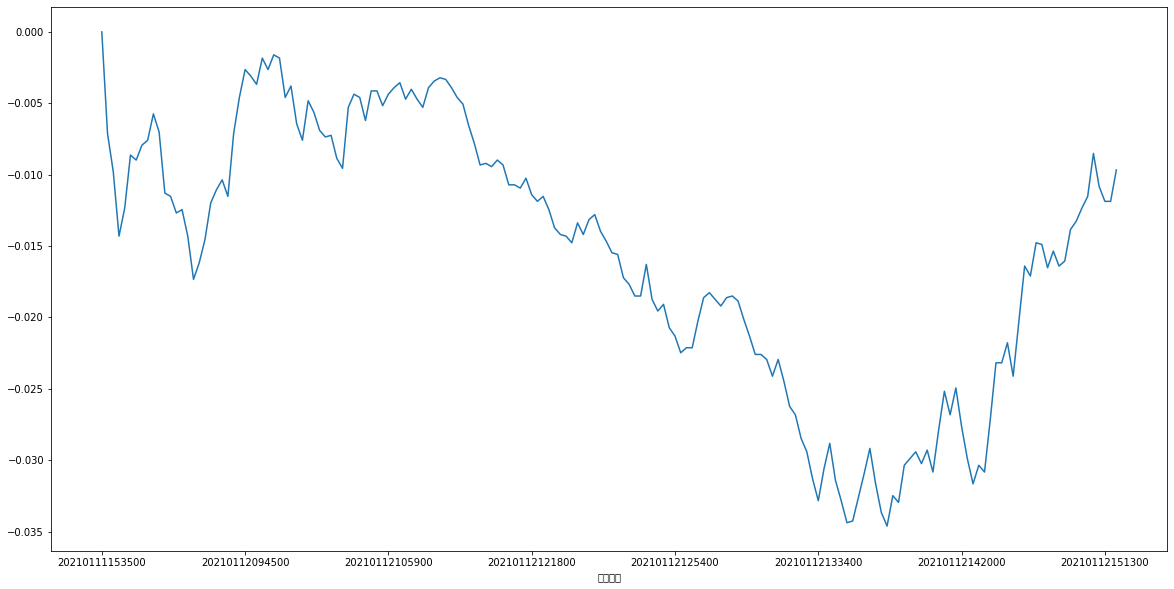

In [6]:
for date in calender[-10:]:
    plt.rcParams["figure.figsize"] = (20, 10)
    # df[date]['spread'].plot()
    # df[date]['ma10_spread'].plot()
    # temp_high = df[date]['ma10_spread'] +40
    # temp_low = df[date]['ma10_spread']-40
    # temp_high.plot(linestyle='--')
    # temp_low.plot(linestyle='--')
    # df[date]['kodex_active'].plot()
    # df[date]['kodex200'].plot()
    # df[date]['kodex_active_cumret'].plot()
    df[date]['kodex200_dayret'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

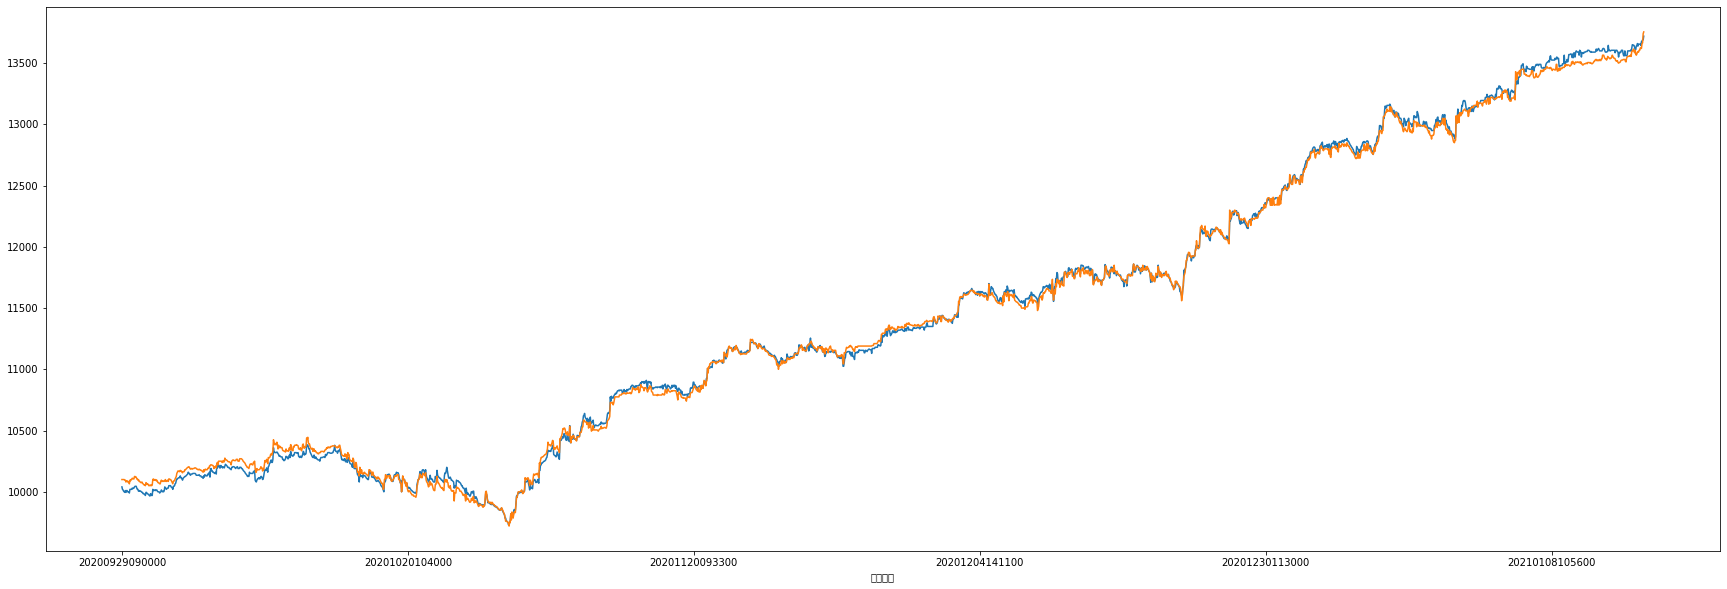

In [ ]:
plt.rcParams["figure.figsize"] = (30, 10)
# temp['kodex_active_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['kodex200_cumret'].plot()
temp['kodex_active'].plot()
temp['kodex200'].plot()
# temp['ma30'].plot()

In [ ]:
for i in range(len(temp)):
    if temp['kodex_active'].iloc[i] < 0:
        temp['kodex_active'].iloc[i] = -temp['kodex_active'].iloc[i]